# Dependencies

In [1]:
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle

In [2]:
df = pd.read_csv('covid_related_disease_data.csv')
df.head()

,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,...,Reinfection,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI
0,1,69,Male,Hovedstaden,Obesity,2022-06-21,Delta,Mild,Moderate,Yes,...,No,NaN,Yes,NaN,1,2022-09-22,NaN,Healthcare,Never,27.7
1,2,38,Male,Sjælland,Asthma,2024-02-02,XBB.1.5,Mild,Moderate,No,...,No,NaN,No,NaN,0,NaN,NaN,Healthcare,Never,21.9
2,3,41,Female,Syddanmark,Hypertension,2023-05-28,Beta,Mild,High,Yes,...,No,NaN,Yes,Janssen,3,2024-05-14,NaN,Unemployed,Never,22.7
3,4,81,Female,Hovedstaden,Asthma,2023-08-13,Delta,Severe,High,No,...,Yes,2024-08-24,Yes,AstraZeneca,1,2024-10-31,NaN,Office Worker,Never,27.7
4,5,50,Female,Syddanmark,Cardiovascular,2023-03-10,Delta,Mild,High,No,...,No,NaN,Yes,NaN,2,2023-07-05,NaN,Student,Never,11.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               3000 non-null   int64  
 1   Age                      3000 non-null   int64  
 2   Gender                   3000 non-null   object 
 3   Region                   3000 non-null   object 
 4   Preexisting_Condition    2531 non-null   object 
 5   Date_of_Infection        3000 non-null   object 
 6   COVID_Strain             3000 non-null   object 
 7   Symptoms                 3000 non-null   object 
 8   Severity                 3000 non-null   object 
 9   Hospitalized             3000 non-null   object 
 10  Hospital_Admission_Date  876 non-null    object 
 11  Hospital_Discharge_Date  876 non-null    object 
 12  ICU_Admission            3000 non-null   object 
 13  Ventilator_Support       3000 non-null   object 
 14  Recovered               

In [4]:
df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
Region                        0
Preexisting_Condition       469
Date_of_Infection             0
COVID_Strain                  0
Symptoms                      0
Severity                      0
Hospitalized                  0
Hospital_Admission_Date    2124
Hospital_Discharge_Date    2124
ICU_Admission                 0
Ventilator_Support            0
Recovered                     0
Date_of_Recovery           1492
Reinfection                   0
Date_of_Reinfection        2715
Vaccination_Status            0
Vaccine_Type               1809
Doses_Received                0
Date_of_Last_Dose          1528
Long_COVID_Symptoms        2780
Occupation                    0
Smoking_Status                0
BMI                           0
dtype: int64

In [5]:
#drop column yang memiliki nan value lebih dari 49% atau berjumlah lebih dari 1470
missing_counts = df.isnull().sum()
columns_to_drop = missing_counts[missing_counts > 1470].index
df_dropped = df.drop(columns=columns_to_drop)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             3000 non-null   int64  
 1   Age                    3000 non-null   int64  
 2   Gender                 3000 non-null   object 
 3   Region                 3000 non-null   object 
 4   Preexisting_Condition  2531 non-null   object 
 5   Date_of_Infection      3000 non-null   object 
 6   COVID_Strain           3000 non-null   object 
 7   Symptoms               3000 non-null   object 
 8   Severity               3000 non-null   object 
 9   Hospitalized           3000 non-null   object 
 10  ICU_Admission          3000 non-null   object 
 11  Ventilator_Support     3000 non-null   object 
 12  Recovered              3000 non-null   object 
 13  Reinfection            3000 non-null   object 
 14  Vaccination_Status     3000 non-null   object 
 15  Dose

In [6]:
df_dropped = df_dropped.drop(columns=['Patient_ID', 'Date_of_Infection'])
df = df_dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3000 non-null   int64  
 1   Gender                 3000 non-null   object 
 2   Region                 3000 non-null   object 
 3   Preexisting_Condition  2531 non-null   object 
 4   COVID_Strain           3000 non-null   object 
 5   Symptoms               3000 non-null   object 
 6   Severity               3000 non-null   object 
 7   Hospitalized           3000 non-null   object 
 8   ICU_Admission          3000 non-null   object 
 9   Ventilator_Support     3000 non-null   object 
 10  Recovered              3000 non-null   object 
 11  Reinfection            3000 non-null   object 
 12  Vaccination_Status     3000 non-null   object 
 13  Doses_Received         3000 non-null   int64  
 14  Occupation             3000 non-null   object 
 15  Smok

In [7]:
df.head()

,Age,Gender,Region,Preexisting_Condition,COVID_Strain,Symptoms,Severity,Hospitalized,ICU_Admission,Ventilator_Support,Recovered,Reinfection,Vaccination_Status,Doses_Received,Occupation,Smoking_Status,BMI
0,69,Male,Hovedstaden,Obesity,Delta,Mild,Moderate,Yes,No,No,Yes,No,Yes,1,Healthcare,Never,27.7
1,38,Male,Sjælland,Asthma,XBB.1.5,Mild,Moderate,No,No,No,No,No,No,0,Healthcare,Never,21.9
2,41,Female,Syddanmark,Hypertension,Beta,Mild,High,Yes,Yes,Yes,No,No,Yes,3,Unemployed,Never,22.7
3,81,Female,Hovedstaden,Asthma,Delta,Severe,High,No,No,No,Yes,Yes,Yes,1,Office Worker,Never,27.7
4,50,Female,Syddanmark,Cardiovascular,Delta,Mild,High,No,No,No,No,No,Yes,2,Student,Never,11.9


In [8]:
numerical_col = df.select_dtypes(include=np.number).columns
categorical_col = df.select_dtypes(exclude=np.number).columns
categorical_col = [col for col in categorical_col if col != 'Hospitalized']

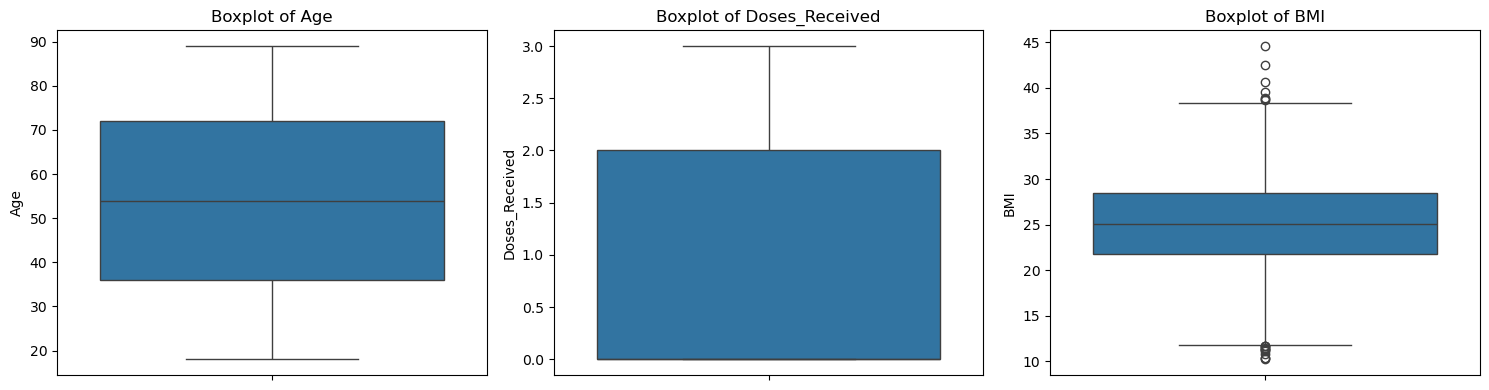

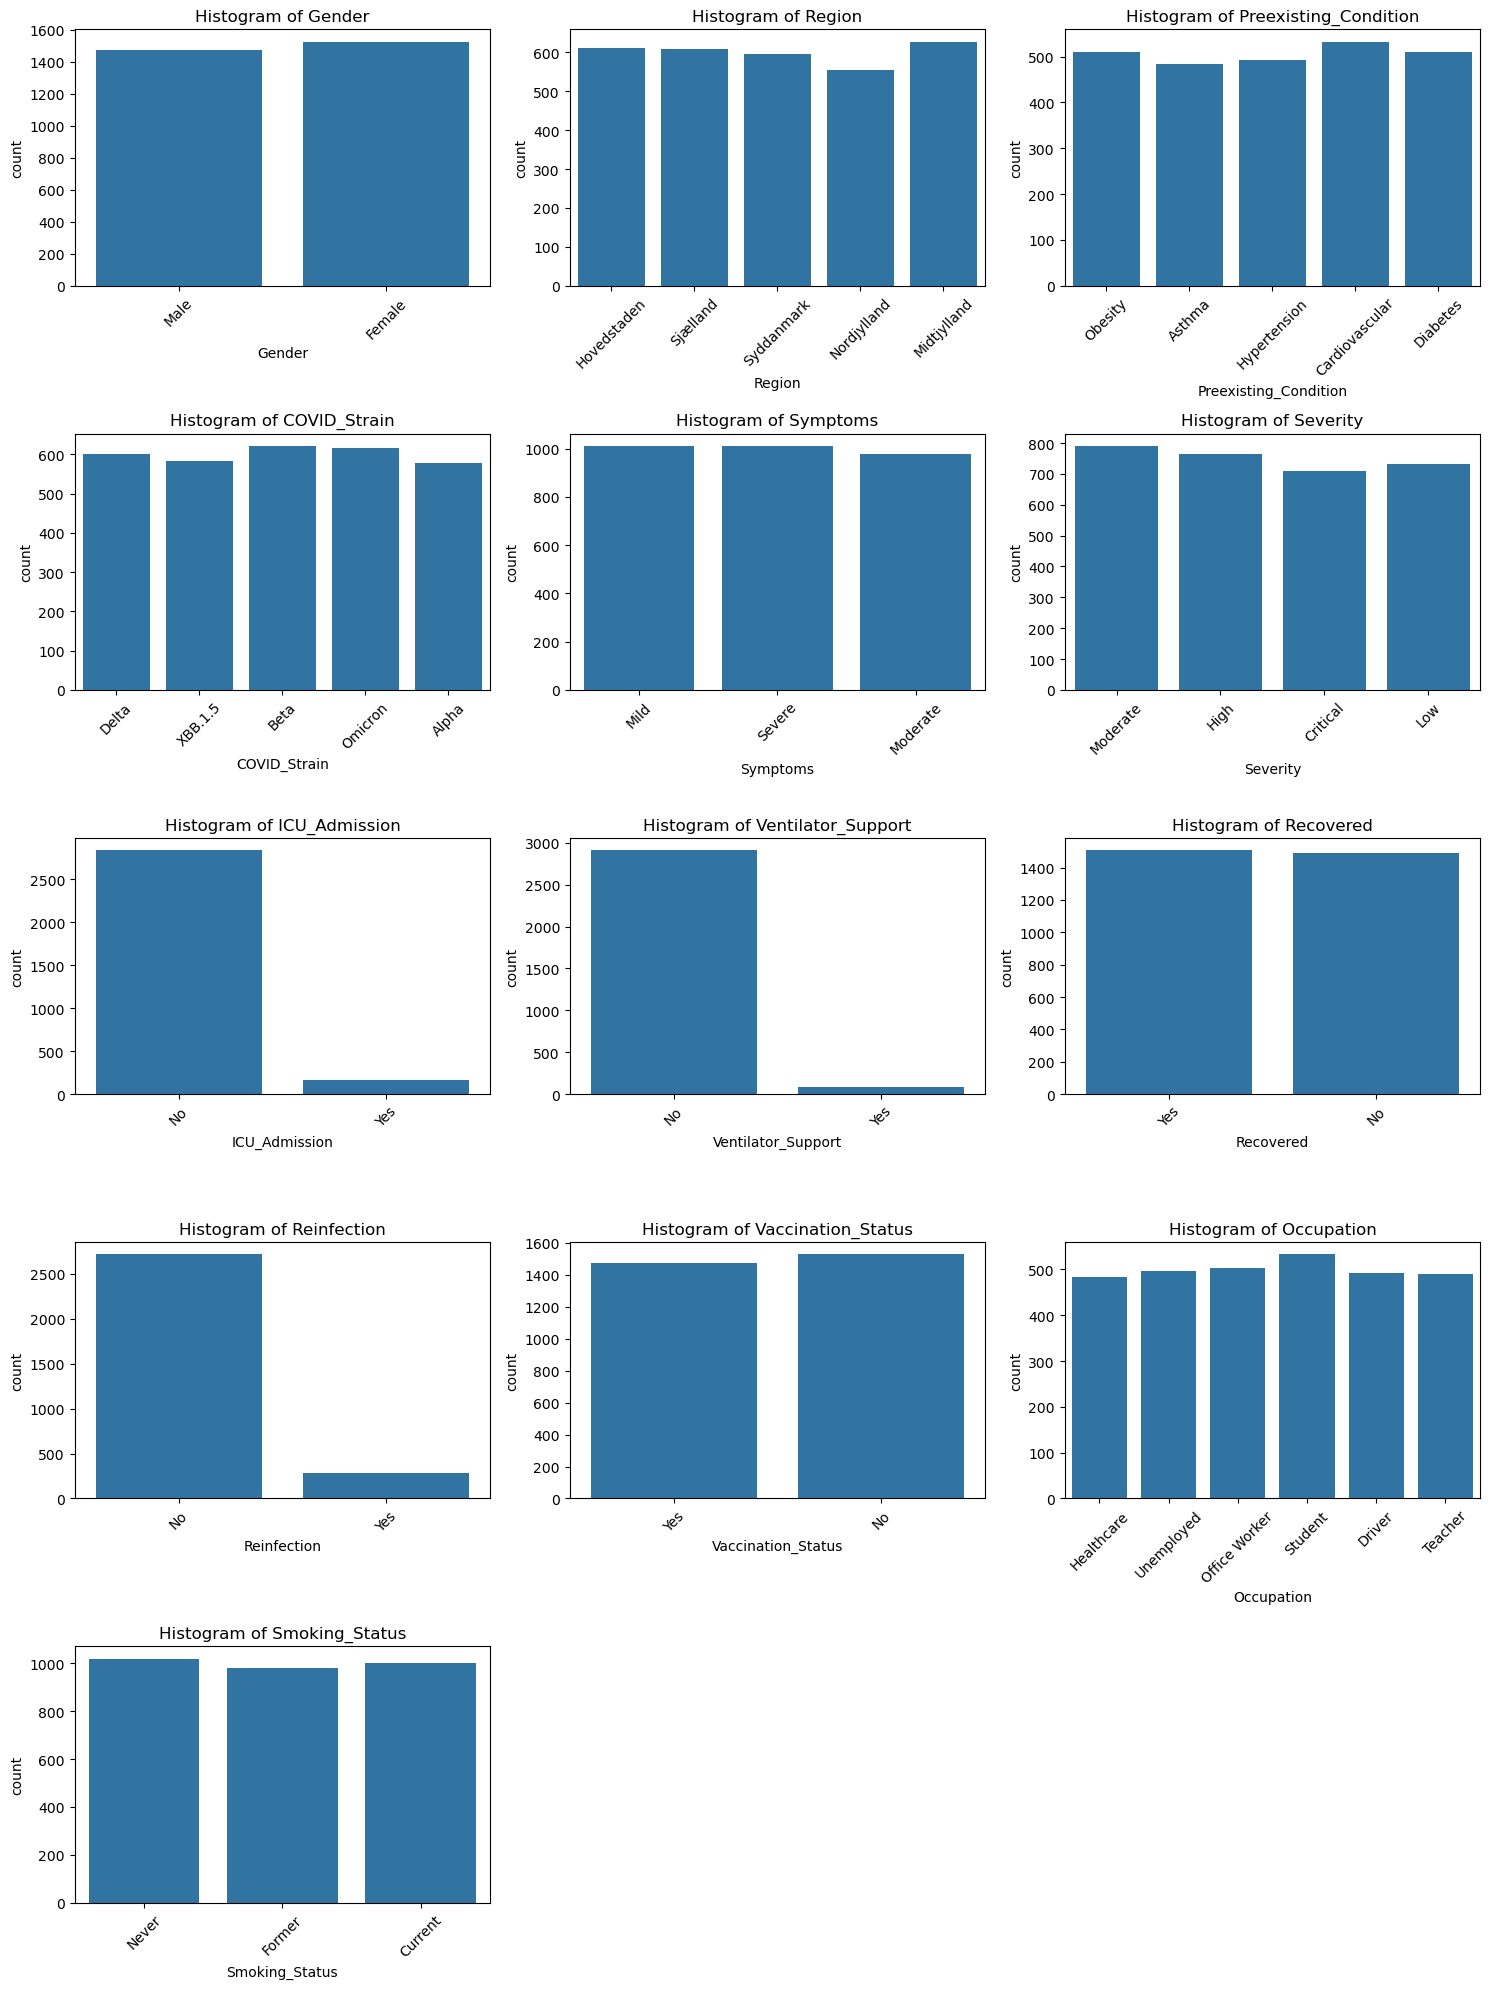

In [9]:
# ---- Boxplot untuk fitur numerik ----
num_cols = numerical_col
num_per_row = 3
num_rows = math.ceil(len(num_cols) / num_per_row)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_per_row, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df_dropped[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ---- Countplot untuk fitur kategorikal ----
cat_cols = categorical_col
cat_per_row = 3
cat_rows = math.ceil(len(cat_cols) / cat_per_row)

fig, axes = plt.subplots(nrows=cat_rows, ncols=cat_per_row, figsize=(15, cat_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=df_dropped[col], ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [10]:
X = df.drop('Hospitalized', axis=1)
y = df['Hospitalized']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=0)

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [15]:
# Combine processing
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_col),
        ('cat', categorical_transformer, categorical_col)
    ]
)

In [16]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 Index(['Age', 'Doses_Received', 'BMI'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Gender', 'Region', 'Preexisting_Condition',
                                  'COVID_Strain', 'Symptoms', 'Severity',
                                  'ICU_Admission', 'Ventilator_Support',
                                  'Recovered', 'Reinfection',
                                  'Vaccination_Status', 'Occupation',
                                  'Smoking_Status'])])

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Buat pipeline dengan preprocessor dan Random Forest Classifier
estimator = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=0))])

In [18]:
estimator

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Age', 'Doses_Received', 'BMI'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Region',
                                                   'Preexisting_Condition',
                                                   'COVID_Strain', 'Symptoms',
                                                   'Severity', 'ICU_Admission',
                                                   'Ventilator_Support',
                                                   'Recovered', 'Reinfection',
                                                   'Vaccination_Status',
                                                   'Occupation',
                                                   'Smoking_Status'])])),
                ('classifier', RandomForestClassifier(random_state=0))])

In [19]:
from sklearn.preprocessing import LabelEncoder

# Buat objek encoder
le = LabelEncoder()

# Encode y_train dan y_test
trained_encoded = le.fit_transform(y_train)
test_encoded = le.transform(y_test)  # atau le.fit_transform(y_test) jika ingin encode mandiri


In [20]:
X_train.head()

,Age,Gender,Region,Preexisting_Condition,COVID_Strain,Symptoms,Severity,ICU_Admission,Ventilator_Support,Recovered,Reinfection,Vaccination_Status,Doses_Received,Occupation,Smoking_Status,BMI
447,56,Female,Nordjylland,Diabetes,Beta,Mild,High,No,No,No,No,Yes,3,Healthcare,Former,17.3
622,25,Female,Hovedstaden,Hypertension,Alpha,Moderate,Critical,No,No,Yes,No,No,0,Healthcare,Former,29.6
2694,25,Female,Sjælland,Diabetes,Alpha,Severe,Moderate,No,No,No,No,Yes,3,Teacher,Current,23.2
2544,56,Female,Midtjylland,Cardiovascular,Alpha,Mild,Moderate,No,No,Yes,Yes,No,0,Office Worker,Never,20.9
2582,34,Female,Nordjylland,Diabetes,Beta,Mild,High,Yes,No,No,No,No,0,Teacher,Former,24.8


In [21]:
trained_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
estimator.fit(X_train, trained_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Age', 'Doses_Received', 'BMI'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Region',
                                                   'Preexisting_Condition',
                                                   'COVID_Strain', 'Symptoms',
                                                   'Severity', 'ICU_Admission',
                                                   'Ventilator_Support',
                                                   'Recovered', 'Reinfection',
                                                   'Vaccination_Status',
                                                   'Occupation',
                                                   'Smoking_Status'])])),
                ('classifier', RandomForestClassifier(random_state=0))])

In [23]:
y_pred = estimator.predict(X_test)
report = classification_report(test_encoded, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       425
           1       0.97      0.19      0.32       175

    accuracy                           0.76       600
   macro avg       0.86      0.59      0.59       600
weighted avg       0.81      0.76      0.70       600



In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, trained_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['Age', 'Doses_Received', 'BMI'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='fir...
                                                                          'Reinfection',
                                                                          'Vaccination_Status',
                                                                          'Occupation',
                                                                          'Smoking_Status'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [25]:
# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

Best parameters found:  {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation accuracy:  0.7629166666666667


In [26]:
# Evaluate the best estimator on the test set
best_estimator = grid_search.best_estimator_
y_pred_tuned = best_estimator.predict(X_test)
report_tuned = classification_report(test_encoded, y_pred_tuned)
print("Classification Report after Tuning:\n")
print(report_tuned)

Classification Report after Tuning:

              precision    recall  f1-score   support

           0       0.75      1.00      0.85       425
           1       0.97      0.18      0.30       175

    accuracy                           0.76       600
   macro avg       0.86      0.59      0.58       600
weighted avg       0.81      0.76      0.69       600



In [ ]:
import pickle
filename = 'random_forest_pipeline.pkl'
model_data = {
    'pipeline': best_estimator,            # Pipeline lengkap (preprocessing + model)
    'label_encoder': le,                   # Encoder untuk target (jika target dikodekan)
    'features': X_train.columns.tolist(),  # Nama fitur untuk validasi input saat inference
    'categorical_cols': categorical_col,   # Kolom kategorikal untuk validasi/preprocessing ulang
    'numeric_cols': numerical_col,         # Kolom numerik
}

with open(filename, 'wb') as f:
    pickle.dump(model_data, f)

print(f"\nModel saved to {filename}")
print("Pipeline completed successfully!")


Model saved to random_forest_pipeline.pkl
Pipeline completed successfully!
